# Illustrations for Ensembles

In [98]:
import json

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [99]:
with open('config.json', 'r') as config_file:
    config = json.load(config_file)

In [100]:
BASE_COLOR = config['base_color']
LIGHT_COLOR = config['light_color']
DPI = config['dpi']
EDGE_COLOR = config['edge_color']
AXIS_COLOR = config['axis_color']
GRID_COLOR = config['grid_color']
FORMAT = config['format']

In [101]:
palette = f"blend:{BASE_COLOR},{LIGHT_COLOR}"

In [102]:
rc = {'axes.edgecolor': AXIS_COLOR,
      'axes.labelcolor': AXIS_COLOR,
      'grid.linestyle': '--',
      'text.color': AXIS_COLOR,
      'xtick.color': AXIS_COLOR,
      'ytick.color': AXIS_COLOR,
      'grid.color': GRID_COLOR}

In [103]:
sns.set(font_scale=2)
sns.set_style("whitegrid", rc=rc)
sns.set_context("talk")

In [104]:
np.random.seed(42)

In [105]:
FIG_SIZE = (16, 7)

## Data preparation

In [106]:
n_samples = 200
outliers_fraction = 0.25
clusters_separation = [0]

In [107]:
n_inliers = int((1. - outliers_fraction) * n_samples)
n_outliers = int(outliers_fraction * n_samples)

In [108]:
offset = 3

In [109]:
X1 = 0.5 * np.random.randn(n_inliers) + offset
X2 = 0.5 * np.random.randn(n_inliers) - offset

In [110]:
outliers_1 = np.random.uniform(low=-6, high=6, size=(n_outliers))
outliers_2 = np.random.uniform(low=-6, high=6, size=(n_outliers))

In [111]:
data = pd.concat([pd.DataFrame({'попугаи': X1, 'удавы': X2}), pd.DataFrame({'попугаи': outliers_1, 'удавы': outliers_2})]).reset_index(drop=True)

In [112]:
indices = np.arange(len(data))

In [113]:
np.random.shuffle(indices)

In [114]:
split_indices = np.array_split(indices, 9)

In [115]:
data['sample'] = 0

In [116]:
samples = []

In [117]:
for i, index in enumerate(split_indices):
    data.loc[index, 'sample'] = i
    samples.append(data.iloc[index].copy())

## Plots

In [118]:
SAVE_KWARGS = {
    'bbox_inches': 'tight',
    'transparent': True,
    'dpi': DPI,
    'pad_inches': 0.1  # Фиксированный отступ
}

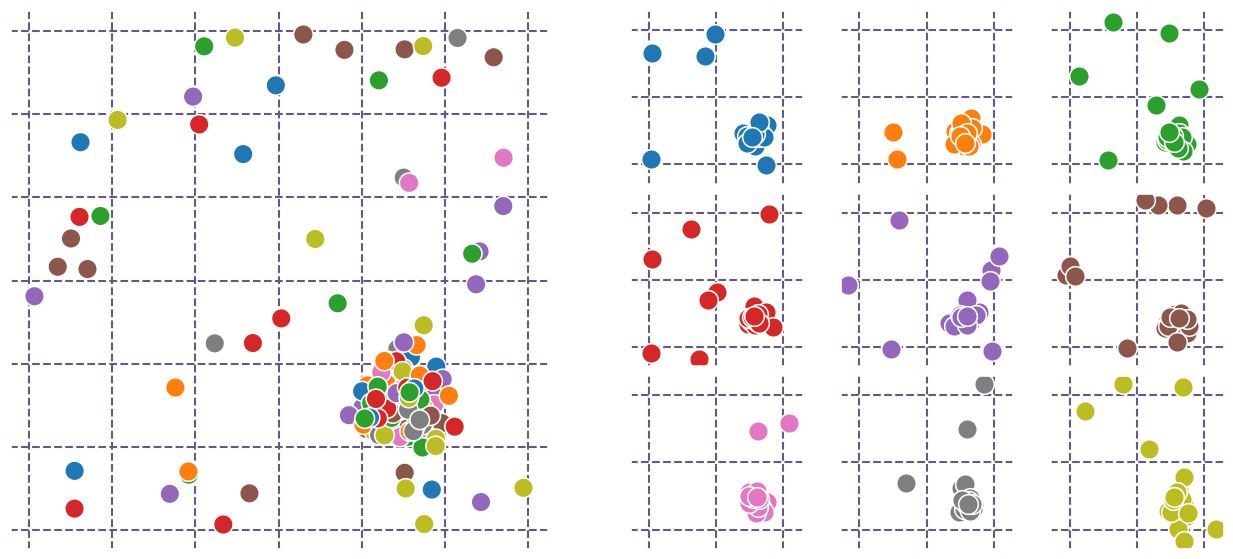

In [119]:
fig = plt.figure(figsize=FIG_SIZE)
gs = fig.add_gridspec(3, 4, width_ratios=[1., 0.3, 0.3, 0.3])

palette = sns.color_palette("tab10", n_colors=len(samples))

# Левая часть: исходные данные
ax_main = fig.add_subplot(gs[:, 0])
sns.scatterplot(
    data=data, 
    x="попугаи", 
    y="удавы", 
    hue='sample',
    s=200, edgecolor=EDGE_COLOR,
    palette=palette,
    legend=False,
    ax=ax_main
)
ax_main.set_xlabel("")
ax_main.set_ylabel("")
ax_main.set_aspect('equal')
ax_main.set_xticklabels([])
ax_main.set_yticklabels([])

# Правая часть: семплы
for i, sample in enumerate(samples):
    row = i // 3
    col = i % 3 + 1
    ax = fig.add_subplot(gs[row, col])
    
    sample_color = palette[i]
    
    sns.scatterplot(
        data=sample, 
        x="попугаи", 
        y="удавы", 
        s=200, edgecolor=EDGE_COLOR,
        color=sample_color,
        ax=ax,
        legend=False
    )
    
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_xlim(ax_main.get_xlim())
    ax.set_ylim(ax_main.get_ylim())
    ax.set_aspect('equal')


# Настройка отступов
plt.subplots_adjust(
    left=0.1,
    right=0.9,
    wspace=0.05, 
    hspace=0.05
)

plt.savefig(f"images/ensembles_data.{FORMAT}", **SAVE_KWARGS)

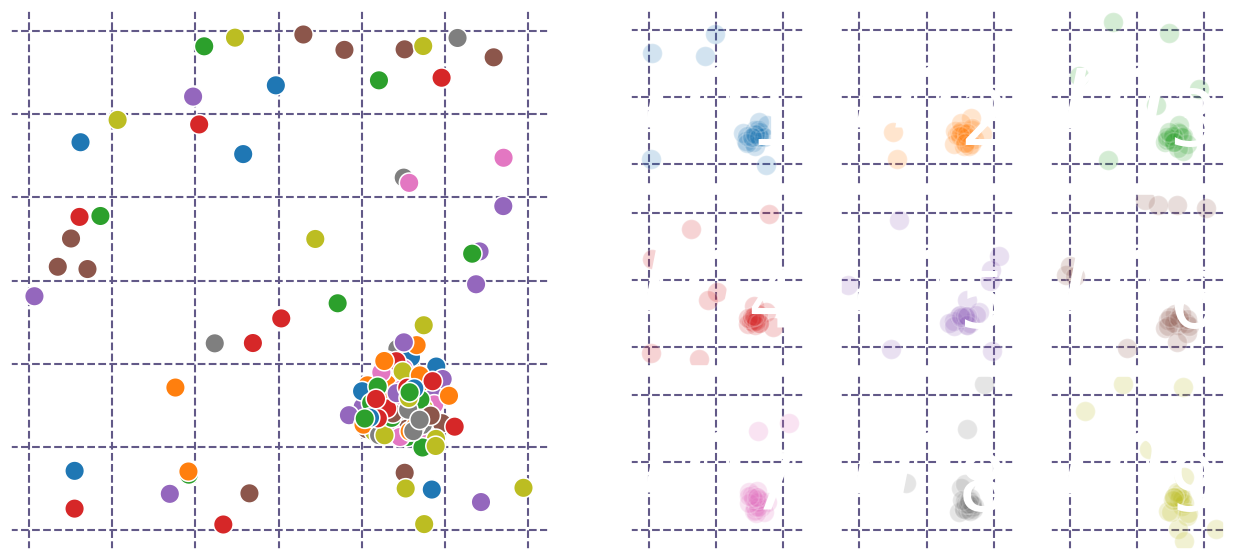

In [120]:
fig = plt.figure(figsize=FIG_SIZE)
gs = fig.add_gridspec(3, 4, width_ratios=[1., 0.3, 0.3, 0.3])

# Левая часть: исходные данные
ax_main = fig.add_subplot(gs[:, 0])
sns.scatterplot(
    data=data, 
    x="попугаи", 
    y="удавы", 
    hue='sample',
    s=200, edgecolor=EDGE_COLOR,
    palette=palette,
    alpha=1.,
    legend=False,
    ax=ax_main
)
ax_main.set_xlabel("")
ax_main.set_ylabel("")
ax_main.set_aspect('equal')
ax_main.set_xticklabels([])
ax_main.set_yticklabels([])

# Правая часть: семплы
for i, sample in enumerate(samples):
    row = i // 3
    col = i % 3 + 1
    ax = fig.add_subplot(gs[row, col])
    
    sample_color = palette[i]
    
    sns.scatterplot(
        data=sample, 
        x="попугаи", 
        y="удавы", 
        s=200, edgecolor=EDGE_COLOR,
        color=sample_color,
        alpha=0.2,
        ax=ax,
        legend=False
    )

    ax.text(0.5, 0.5, f'$m_{i + 1}$', 
            fontsize=80,  
            ha='center', va='center', 
            color=AXIS_COLOR, 
            alpha=1., 
            transform=ax.transAxes)

    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_xlim(ax_main.get_xlim())
    ax.set_ylim(ax_main.get_ylim())
    ax.set_aspect('equal')


# Настройка отступов
plt.subplots_adjust(
    left=0.1,
    right=0.9,
    wspace=0.05, 
    hspace=0.05
)

plt.savefig(f"images/ensembles_separate_models.{FORMAT}", **SAVE_KWARGS)

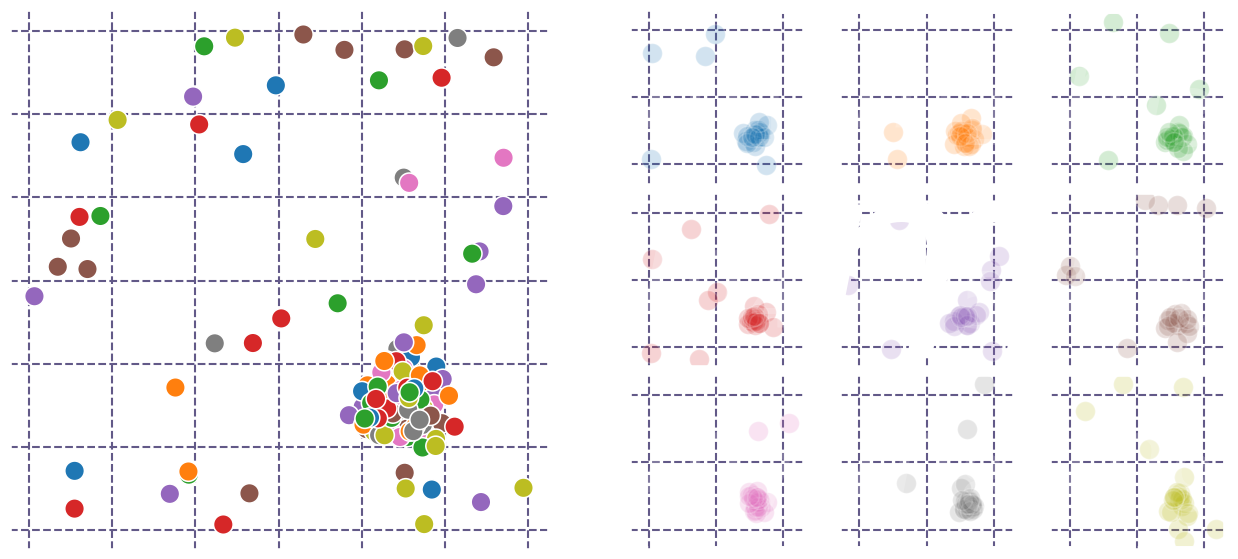

In [121]:
fig = plt.figure(figsize=FIG_SIZE)
gs = fig.add_gridspec(3, 4, width_ratios=[1., 0.3, 0.3, 0.3])


# Левая часть: исходные данные
ax_main = fig.add_subplot(gs[:, 0])
sns.scatterplot(
    data=data, 
    x="попугаи", 
    y="удавы", 
    hue='sample',
    s=200, edgecolor=EDGE_COLOR,
    palette=palette,
    legend=False,
    ax=ax_main
)
ax_main.set_xlabel("")
ax_main.set_ylabel("")
ax_main.set_aspect('equal')
ax_main.set_xticklabels([])
ax_main.set_yticklabels([])

# Правая часть: семплы
# Список для хранения позиций правых графиков
right_plots = []

for i, sample in enumerate(samples):
    row = i // 3
    col = i % 3 + 1
    ax = fig.add_subplot(gs[row, col])
    right_plots.append(ax)
    
    sns.scatterplot(
        data=sample, 
        x="попугаи", 
        y="удавы", 
        s=200, edgecolor=EDGE_COLOR,
        color=palette[i],
        alpha=0.2,
        ax=ax,
        legend=False
    )

    ax.text(0.5, 0.5, f'$m_{i + 1}$', 
            fontsize=80,
            ha='center', va='center',
            color=AXIS_COLOR,
            alpha=.2,
            transform=ax.transAxes)
    
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_xlim(ax_main.get_xlim())
    ax.set_ylim(ax_main.get_ylim())
    ax.set_aspect('equal')

# Вычисляем границы прямоугольника с учетом всех правых графиков
x0 = min(ax.get_position().x0 for ax in right_plots)
x1 = max(ax.get_position().x1 for ax in right_plots)
y0 = min(ax.get_position().y0 for ax in right_plots)
y1 = max(ax.get_position().y1 for ax in right_plots)

# Рисуем прямоугольник на Figure (не на Axes)
rect = plt.Rectangle(
    (x0, y0), x1-x0, y1-y0,
    transform=fig.transFigure,
    linewidth=5, edgecolor=AXIS_COLOR, facecolor='none',
    linestyle='--', zorder=0
)
fig.patches.append(rect)

# Добавляем одну большую букву M в центре прямоугольника
center_x = (x0 + x1) / 2
center_y = (y0 + y1) / 2
fig.text(
    center_x, center_y, '$m$',
    fontsize=200,  
    ha='center', va='center',
    color=AXIS_COLOR, alpha=1.,  
    zorder=1
)

# Настройка отступов
plt.subplots_adjust(
    left=0.1,
    right=0.9,
    wspace=0.05, 
    hspace=0.05
)

plt.savefig(f"images/ensembles_one_model.{FORMAT}", bbox_extra_artists=[], **SAVE_KWARGS)